In [1]:
#pip install plotly

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import pymongo

# Import API key
#from api_keys import g_key
#from api_keys import aqi_key

In [3]:
YR2015 = pd.read_csv('2015.csv')
YR2016 = pd.read_csv('2016.csv')
YR2017 = pd.read_csv('2017.csv')
YR2018 = pd.read_csv('2018.csv')
YR2019 = pd.read_csv('2019.csv')

In [4]:
YR2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [5]:
YR2015.drop(['Region', 'Standard Error', 'Dystopia Residual'], axis=1, inplace=True)
YR2015

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [6]:
YR2016.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


In [7]:
YR2016.drop(['Region', 'Lower Confidence Interval','Upper Confidence Interval', 'Dystopia Residual'], axis=1, inplace=True)
YR2016

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492
...,...,...,...,...,...,...,...,...,...
152,Benin,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180
153,Afghanistan,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268
154,Togo,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517
155,Syria,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397


In [8]:
YR2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [9]:
YR2017.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis=1, inplace=True)
YR2017

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612
...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148


In [10]:
YR2018.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


In [11]:
YR2019.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [12]:
YR2015.rename(columns = {'Happiness Rank':'Happiness_Rank'}, inplace = True)
YR2015.rename(columns = {'Happiness Score':'Happiness_Score'}, inplace = True)
YR2015.rename(columns = {'Economy (GDP per Capita)':'GDP'}, inplace = True)
YR2015.rename(columns = {'Family':'Social_Support'}, inplace = True)
YR2015.rename(columns = {'Health (Life Expectancy)':'Life_Expectancy'}, inplace = True)
#YR2015.rename(columns = {'Freedom':'Freedom'}, inplace = True)
YR2015.rename(columns = {'Trust (Government Corruption)':'Government_Corruption'}, inplace = True)
#YR2015.rename(columns = {'Generosity':'Generosity'}, inplace = True)
YR2015['Year'] = 2015 
YR2015

,Country,Happiness_Rank,Happiness_Score,GDP,Social_Support,Life_Expectancy,Freedom,Government_Corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,2015
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,2015
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,2015
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,2015


In [13]:
YR2016.rename(columns = {'Happiness Rank':'Happiness_Rank'}, inplace = True)
YR2016.rename(columns = {'Happiness Score':'Happiness_Score'}, inplace = True)
YR2016.rename(columns = {'Economy (GDP per Capita)':'GDP'}, inplace = True)
YR2016.rename(columns = {'Family':'Social_Support'}, inplace = True)
YR2016.rename(columns = {'Health (Life Expectancy)':'Life_Expectancy'}, inplace = True)
#YR2016.rename(columns = {'Freedom':'Freedom'}, inplace = True)
YR2016.rename(columns = {'Trust (Government Corruption)':'Government_Corruption'}, inplace = True)
#YR2016.rename(columns = {'Generosity':'Generosity'}, inplace = True)
YR2016['Year'] = 2016 
YR2016

,Country,Happiness_Rank,Happiness_Score,GDP,Social_Support,Life_Expectancy,Freedom,Government_Corruption,Generosity,Year
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016
...,...,...,...,...,...,...,...,...,...,...
152,Benin,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2016
153,Afghanistan,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2016
154,Togo,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2016
155,Syria,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,2016


In [14]:
YR2017.rename(columns = {'Happiness.Rank':'Happiness_Rank'}, inplace = True)
YR2017.rename(columns = {'Happiness.Score':'Happiness_Score'}, inplace = True)
YR2017.rename(columns = {'Economy..GDP.per.Capita.':'GDP'}, inplace = True)
YR2017.rename(columns = {'Family':'Social_Support'}, inplace = True)
YR2017.rename(columns = {'Health..Life.Expectancy.':'Life_Expectancy'}, inplace = True)
#YR2017.rename(columns = {'Freedom':'Freedom'}, inplace = True)
YR2017.rename(columns = {'Trust..Government.Corruption.':'Government_Corruption'}, inplace = True)
#YR2017.rename(columns = {'Generosity':'Generosity'}, inplace = True)
YR2017['Year'] = 2017 
YR2017

,Country,Happiness_Rank,Happiness_Score,GDP,Social_Support,Life_Expectancy,Freedom,Generosity,Government_Corruption,Year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017
...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,2017
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,2017
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,2017
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,2017


In [15]:
YR2018.rename(columns = {'Country or region':'Country'}, inplace = True)
YR2018.rename(columns = {'Overall rank':'Happiness_Rank'}, inplace = True)
YR2018.rename(columns = {'Score':'Happiness_Score'}, inplace = True)
YR2018.rename(columns = {'GDP per capita':'GDP'}, inplace = True)
YR2018.rename(columns = {'Social support':'Social_Support'}, inplace = True)
YR2018.rename(columns = {'Healthy life expectancy':'Life_Expectancy'}, inplace = True)
YR2018.rename(columns = {'Freedom to make life choices':'Freedom'}, inplace = True)
YR2018.rename(columns = {'Perceptions of corruption':'Government_Corruption'}, inplace = True)
#YR2018.rename(columns = {'Generosity':'Generosity'}, inplace = True)
YR2018['Year'] = 2018 
YR2018

,Happiness_Rank,Country,Happiness_Score,GDP,Social_Support,Life_Expectancy,Freedom,Generosity,Government_Corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,2018
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,2018
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2018
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2018


In [16]:
YR2019.rename(columns = {'Country or region':'Country'}, inplace = True)
YR2019.rename(columns = {'Overall rank':'Happiness_Rank'}, inplace = True)
YR2019.rename(columns = {'Score':'Happiness_Score'}, inplace = True)
YR2019.rename(columns = {'GDP per capita':'GDP'}, inplace = True)
YR2019.rename(columns = {'Social support':'Social_Support'}, inplace = True)
YR2019.rename(columns = {'Healthy life expectancy':'Life_Expectancy'}, inplace = True)
YR2019.rename(columns = {'Freedom to make life choices':'Freedom'}, inplace = True)
YR2019.rename(columns = {'Perceptions of corruption':'Government_Corruption'}, inplace = True)
#YR2019.rename(columns = {'Generosity':'Generosity'}, inplace = True)
YR2019['Year'] = 2019 
YR2019

,Happiness_Rank,Country,Happiness_Score,GDP,Social_Support,Life_Expectancy,Freedom,Generosity,Government_Corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019


In [17]:
#add a 10th column for the year, and then merge data

In [18]:
frames=[YR2015, YR2016, YR2017, YR2018, YR2019]
YR2015_2019 = pd.concat(frames, sort=True)
YR2015_2019.replace(np.nan, 0, inplace=True)
YR2015_2019

,Country,Freedom,GDP,Generosity,Government_Corruption,Happiness_Rank,Happiness_Score,Life_Expectancy,Social_Support,Year
0,Switzerland,0.66557,1.39651,0.29678,0.41978,1,7.587,0.94143,1.34951,2015
1,Iceland,0.62877,1.30232,0.43630,0.14145,2,7.561,0.94784,1.40223,2015
2,Denmark,0.64938,1.32548,0.34139,0.48357,3,7.527,0.87464,1.36058,2015
3,Norway,0.66973,1.45900,0.34699,0.36503,4,7.522,0.88521,1.33095,2015
4,Canada,0.63297,1.32629,0.45811,0.32957,5,7.427,0.90563,1.32261,2015
...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,0.55500,0.35900,0.21700,0.41100,152,3.334,0.61400,0.71100,2019
152,Tanzania,0.41700,0.47600,0.27600,0.14700,153,3.231,0.49900,0.88500,2019
153,Afghanistan,0.00000,0.35000,0.15800,0.02500,154,3.203,0.36100,0.51700,2019
154,Central African Republic,0.22500,0.02600,0.23500,0.03500,155,3.083,0.10500,0.00000,2019


In [19]:
Groupby_ = YR2015_2019.groupby('Country').agg({'GDP': ['mean'],'Freedom': ['mean'], 'Generosity': ['mean'], 'Government_Corruption': ['mean'],
                                              'Happiness_Score': ['mean'], 'Life_Expectancy': ['mean'], 'Social_Support': ['mean']})
Groupby_ = Groupby_.reset_index()
Groupby_.columns= Groupby_.columns.droplevel(1)
Groupby_

# Groupby_ = YR2015_2019.groupby('Country').mean({'GDP','Freedom', 'Generosity', 'Government_Corruption',
#                                               'Happiness_Score', 'Life_Expectancy', 'Social_Support'})
# Groupby_ = Groupby_.reset_index()
# Groupby_

,Country,GDP,Freedom,Generosity,Government_Corruption,Happiness_Score,Life_Expectancy,Social_Support
0,Afghanistan,0.357113,0.117924,0.267730,0.058094,3.51280,0.254707,0.409753
1,Albania,0.938633,0.371898,0.167887,0.043201,4.71260,0.787696,0.754931
2,Algeria,1.012963,0.178437,0.069219,0.146099,5.66760,0.665057,1.074205
3,Angola,0.798380,0.027433,0.105269,0.071570,3.87225,0.133902,0.938368
4,Argentina,1.111035,0.481620,0.092371,0.064308,6.45940,0.760895,1.330960
...,...,...,...,...,...,...,...,...
165,Venezuela,1.052468,0.213709,0.057186,0.071444,5.53140,0.683741,1.323264
166,Vietnam,0.723416,0.577207,0.195664,0.091921,5.15460,0.722700,1.138384
167,Yemen,0.489313,0.244175,0.096929,0.067045,3.62580,0.365440,0.865448
168,Zambia,0.571761,0.462099,0.218430,0.097337,4.58440,0.302761,0.932381


In [20]:
#YR2015_2016 = pd.merge(YR2015, YR2016, on="Country", how="outer")
#YR2015_2016
No_country = Groupby_.drop('Country', axis=1)
print(No_country.columns)

Index(['GDP', 'Freedom', 'Generosity', 'Government_Corruption',
       'Happiness_Score', 'Life_Expectancy', 'Social_Support'],
      dtype='object')


In [21]:
from sklearn.linear_model import LinearRegression
X2 = No_country.drop('Happiness_Score',axis=1)
lm2 = LinearRegression()
lm2.fit(X2, No_country.Happiness_Score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
coef2 = zip(X2.columns, lm2.coef_)
coef_df2 = pd.DataFrame(list(zip(X2.columns, lm2.coef_)), columns=['Features', 'Coefficents'])
coef_df2

,Features,Coefficents
0,GDP,0.849983
1,Freedom,1.657196
2,Generosity,0.354902
3,Government_Corruption,0.877458
4,Life_Expectancy,1.008688
5,Social_Support,1.125802


In [23]:
lm2.predict(X2)[0:155]

array([3.26858923, 5.06147402, 5.09505852, 3.9211246 , 6.00302585,
       4.74678136, 7.02614452, 6.76875054, 5.40686776, 6.33599289,
       4.64026314, 5.72480484, 6.6689511 , 5.25699956, 3.71025936,
       5.6281794 , 5.37518052, 4.95565724, 5.32187987, 5.8480269 ,
       5.56580521, 4.21582459, 3.02975586, 5.11182209, 4.35121013,
       6.97473785, 2.6505049 , 3.64537459, 5.94104781, 5.6374037 ,
       5.79711396, 3.82924801, 4.49849732, 3.89346542, 6.24397731,
       5.296198  , 5.82342646, 6.15398252, 7.12244924, 4.38659262,
       5.91419347, 5.71887015, 4.75170208, 5.32091004, 6.22617251,
       4.31809625, 7.01205945, 6.46772193, 5.02795591, 4.53110686,
       4.69768732, 6.76203595, 4.46795117, 5.17409548, 5.56594605,
       3.86462507, 3.62991489, 5.12349767, 6.66727231, 6.80166205,
       5.52791379, 6.98618617, 4.6137595 , 5.50142209, 4.9655701 ,
       4.83871526, 7.0092535 , 6.3237906 , 5.94978828, 4.25743982,
       5.69682335, 6.5203663 , 5.46711447, 5.90448656, 4.75802

In [24]:
import os
import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
import sklearn
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [25]:
trace = go.Scatter(
    x= lm2.predict(X2),
    y= No_country.Happiness_Score,
    mode = 'markers'
)

data = [trace]
layout = go.Layout(
title = 'Happiness Stuff',
xaxis=dict(
    title = 'Happiness Score')
    ,
yaxis = dict(
title='Predicted Happiness Score')
    )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [89]:
No_country

,GDP,Freedom,Generosity,Government_Corruption,Happiness_Score,Life_Expectancy,Social_Support
0,0.357113,0.117924,0.267730,0.058094,3.51280,0.254707,0.409753
1,0.938633,0.371898,0.167887,0.043201,4.71260,0.787696,0.754931
2,1.012963,0.178437,0.069219,0.146099,5.66760,0.665057,1.074205
3,0.798380,0.027433,0.105269,0.071570,3.87225,0.133902,0.938368
4,1.111035,0.481620,0.092371,0.064308,6.45940,0.760895,1.330960
...,...,...,...,...,...,...,...
165,1.052468,0.213709,0.057186,0.071444,5.53140,0.683741,1.323264
166,0.723416,0.577207,0.195664,0.091921,5.15460,0.722700,1.138384
167,0.489313,0.244175,0.096929,0.067045,3.62580,0.365440,0.865448
168,0.571761,0.462099,0.218430,0.097337,4.58440,0.302761,0.932381


In [92]:
#Mean2_Error = np.mean((Groupby_.Happiness_Score - lm2.predict(X)) ** 2)
#print (Mean2_Error)

In [26]:
New_df = YR2015_2019.drop(['Country', 'Happiness_Rank', 'Year','Government_Corruption','Social_Support','Generosity'], axis=1)
New_df.head()

,Freedom,GDP,Happiness_Score,Life_Expectancy
0,0.66557,1.39651,7.587,0.94143
1,0.62877,1.30232,7.561,0.94784
2,0.64938,1.32548,7.527,0.87464
3,0.66973,1.45900,7.522,0.88521
4,0.63297,1.32629,7.427,0.90563


In [27]:
from sklearn.linear_model import LinearRegression
X = New_df.drop('Happiness_Score', axis=1)
lm = LinearRegression()
lm.fit(X, New_df.Happiness_Score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
coef = zip(X.columns, lm.coef_)
coef_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns=['Features', 'Coefficents'])
coef_df

,Features,Coefficents
0,Freedom,2.194553
1,GDP,1.331726
2,Life_Expectancy,1.197256


In [29]:
lm.predict(X)[0:155]

array([6.9712449 , 6.77272447, 6.76115785, 6.99628408, 6.7633269 ,
       6.71468931, 6.71444068, 6.83569832, 6.67931677, 6.84417451,
       6.16073721, 6.21733515, 6.74072479, 5.91524523, 6.6109171 ,
       5.74137531, 7.05809255, 6.73051575, 6.62163253, 6.80128624,
       6.60749546, 6.63680917, 5.7186421 , 6.96849108, 6.08345865,
       6.70907054, 5.99456352, 7.1348911 , 6.56496602, 5.85619561,
       6.12275353, 6.23392407, 5.74741983, 5.91711019, 5.92570723,
       6.31442519, 6.51860022, 6.1630201 , 6.67937993, 5.88661052,
       6.10005328, 5.23836001, 5.55486986, 5.52605203, 5.72183422,
       6.49143225, 6.06576859, 5.68706503, 6.17948838, 5.90838652,
       5.33660067, 4.77582313, 5.50983112, 5.92274497, 6.4829262 ,
       5.39540185, 5.42091822, 5.50737337, 5.61179527, 6.12112782,
       6.05210144, 5.47687533, 5.78755138, 5.64495532, 5.53290104,
       6.31418103, 6.13091938, 5.14127023, 4.89004818, 5.49011429,
       5.94542645, 6.8908251 , 5.96881714, 5.41341209, 5.56417

In [30]:
# import os
# import statsmodels.formula.api as stats
# from statsmodels.formula.api import ols
# import sklearn
# from sklearn import linear_model, datasets
# from sklearn.metrics import mean_squared_error
# import plotly
# import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)

In [31]:
trace = go.Scatter(
    x= lm.predict(X),
    y= New_df.Happiness_Score,
    mode = 'markers'
)

data = [trace]
layout = go.Layout(
title = 'Happiness Stuff',
xaxis=dict(
    title = 'Happiness Score')
    ,
yaxis = dict(
title='Predicted Happiness Score')
    )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
#lm3 = LinearRegression()
#lm3.fit(X[['Family']], New_df.Happiness_Score)

In [34]:
msehappy = np.mean((New_df.Happiness_Score - lm.predict(X)) **2)
print(msehappy)

0.33062472367785894


In [35]:
YR2015_2019.describe()

,Freedom,GDP,Generosity,Government_Corruption,Happiness_Rank,Happiness_Score,Life_Expectancy,Social_Support,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,0.411091,0.916047,0.218576,0.125275,78.698210,5.379018,0.612416,1.078392,2016.993606
std,0.152880,0.407340,0.122321,0.105844,45.182384,1.127456,0.248309,0.329548,1.417364
min,0.000000,0.000000,0.000000,0.000000,1.000000,2.693000,0.000000,0.000000,2015.000000
25%,0.309768,0.606500,0.130000,0.054000,40.000000,4.509750,0.440183,0.869363,2016.000000
50%,0.431000,0.982205,0.201982,0.090905,79.000000,5.322000,0.647310,1.124735,2017.000000
75%,0.531000,1.236187,0.278832,0.155861,118.000000,6.189500,0.808000,1.327250,2018.000000
max,0.724000,2.096000,0.838075,0.551910,158.000000,7.769000,1.141000,1.644000,2019.000000


In [36]:
YR2015_2019.to_csv("YR2015_2019Final.csv", encoding='utf-8', index=False)

In [37]:
import os
import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
import sklearn
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error

In [38]:
X = YR2015_2019["Generosity"].values.reshape(-1, 1)
y = YR2015_2019.Happiness_Rank.values.reshape(-1, 1)

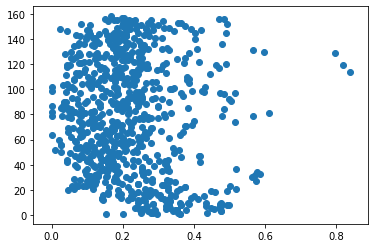

In [39]:
plt.scatter(X, y)

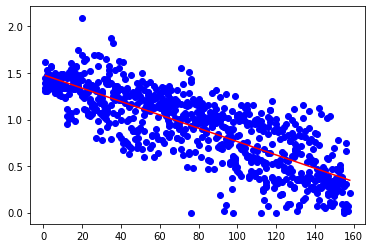

In [40]:
X = YR2015_2019["Happiness_Rank"].values.reshape(-1, 1)
y = YR2015_2019.GDP.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

y_min = modelLR.predict(x_min)
y_max = modelLR.predict(x_max)

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')


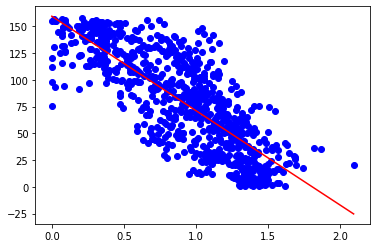

In [41]:
X = YR2015_2019["GDP"].values.reshape(-1, 1)
y = YR2015_2019.Happiness_Rank.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

y_min = modelLR.predict(x_min)
y_max = modelLR.predict(x_max)

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')


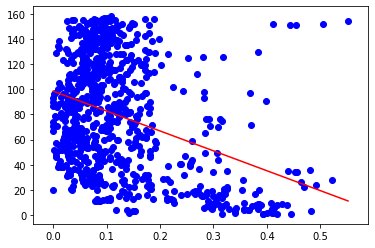

In [42]:
X = YR2015_2019["Government_Corruption"].values.reshape(-1, 1)
y = YR2015_2019.Happiness_Rank.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

y_min = modelLR.predict(x_min)
y_max = modelLR.predict(x_max)

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

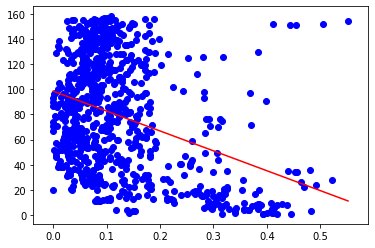

In [43]:
X = YR2015_2019["Government_Corruption"].values.reshape(-1, 1)
y = YR2015_2019.Happiness_Rank.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

y_min = modelLR.predict(x_min)
y_max = modelLR.predict(x_max)

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [44]:
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
print('Generosity: ', modelLR.coef_)
print('y-axis intercept: ', modelLR.intercept_)

Generosity:  [[-157.97526557]]
y-axis intercept:  [98.48859428]


In [46]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.]]
Max X Value: [[0.55191]]


In [47]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = modelLR.predict(x_min)
y_max = modelLR.predict(x_max)

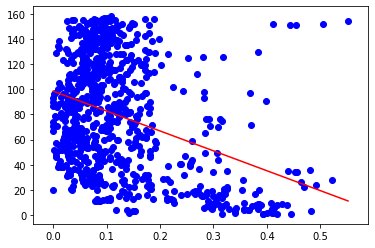

In [48]:
#What is this?!?!?!
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [49]:
#10 data viz Vs Happiness_Rank

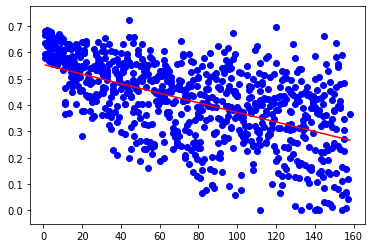

In [50]:
X = YR2015_2019["Happiness_Rank"].values.reshape(-1, 1)
y = YR2015_2019.Freedom.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

y_min = modelLR.predict(x_min)
y_max = modelLR.predict(x_max)

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

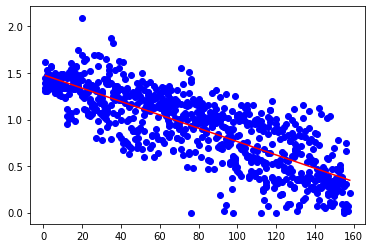

In [51]:
X = YR2015_2019["Happiness_Rank"].values.reshape(-1, 1)
y = YR2015_2019.GDP.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

y_min = modelLR.predict(x_min)
y_max = modelLR.predict(x_max)

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

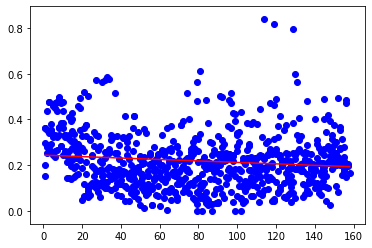

In [52]:
X = YR2015_2019["Happiness_Rank"].values.reshape(-1, 1)
y = YR2015_2019.Generosity.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

y_min = modelLR.predict(x_min)
y_max = modelLR.predict(x_max)

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

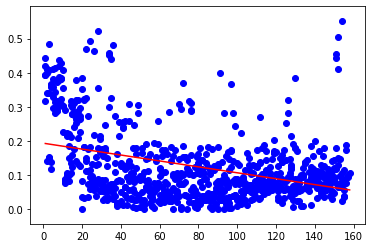

In [53]:
X = YR2015_2019["Happiness_Rank"].values.reshape(-1, 1)
y = YR2015_2019.Government_Corruption.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

y_min = modelLR.predict(x_min)
y_max = modelLR.predict(x_max)

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

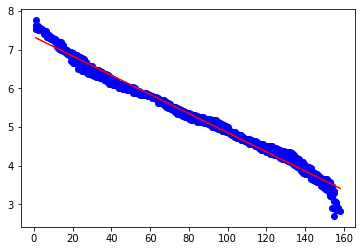

In [54]:
X = YR2015_2019["Happiness_Rank"].values.reshape(-1, 1)
y = YR2015_2019.Happiness_Score.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

y_min = modelLR.predict(x_min)
y_max = modelLR.predict(x_max)

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

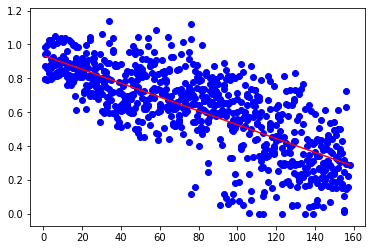

In [55]:
X = YR2015_2019["Happiness_Rank"].values.reshape(-1, 1)
y = YR2015_2019.Life_Expectancy.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

y_min = modelLR.predict(x_min)
y_max = modelLR.predict(x_max)

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

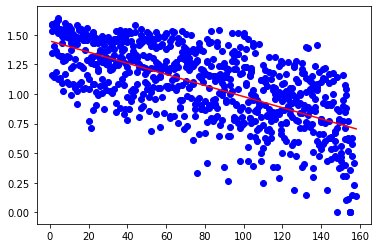

In [99]:
X = YR2015_2019["Happiness_Rank"].values.reshape(-1, 1)
y = YR2015_2019.Social_Support.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

y_min = modelLR.predict(x_min)
y_max = modelLR.predict(x_max)

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [63]:
drop_rank = YR2015_2019.drop(["Happiness_Rank", "Year"], axis = 1)

In [64]:
corr_matrix_happy = drop_rank.corr()
trace_corr_happy = go.Heatmap(z=np.array(corr_matrix_happy), x=corr_matrix_happy.columns, y=corr_matrix_happy.columns)
data_happy=[trace_corr_happy]
iplot(data_happy)

In [65]:
coef2 = zip(X2.columns, lm2.coef_)
coef_df2 = pd.DataFrame(list(zip(X2.columns, lm2.coef_)), columns=['Features', 'Coefficents'])
coef_df2

,Features,Coefficents
0,GDP,0.849983
1,Freedom,1.657196
2,Generosity,0.354902
3,Government_Corruption,0.877458
4,Life_Expectancy,1.008688
5,Social_Support,1.125802


In [80]:
# Assign X (data) and y (target)
X = Groupby_.drop("Happiness_Score", axis=1)
y = Groupby_["Happiness_Score"]
print(X.shape, y.shape)

(170, 7) (170,)


In [81]:
from sklearn.model_selection import train_test_split
#What in the world is the #1 for in random_state???
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [93]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
classifier.fit(X_train, y_train)

ValueError: could not convert string to float: 'Lithuania'